## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [4]:
df.shape

(202772, 12)

In [5]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [6]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_63830/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [7]:
df_v1 = df_age[df_age['품목대분류'] == '화재 안전 및 보안 장비']
df_v1['품목대분류'].unique()

array(['화재 안전 및 보안 장비'], dtype=object)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,범주형 발생일,위해원인,위해증상,위해부위,발생장소
20033,여자,35-39,20200501-10,피부접촉에 의한 위험 및 위해,기타 피부 및 피하조직 손상,(부위)무릎,"기타 - 상세불명의 장소, 부대·부속시설"
20034,여자,35-39,20201001-10,피부접촉에 의한 위험 및 위해,기타 피부 및 피하조직 손상,(부위)무릎,"기타 - 상세불명의 장소, 부대·부속시설"
20035,여자,25-29,20200501-10,피부접촉에 의한 위험 및 위해,두드러기,(부위)발,"기타 - 상세불명의 장소, 부대·부속시설"
20082,남자,35-39,20200901-10,피부접촉에 의한 위험 및 위해,박리(벗겨짐),"(부위)다리(무릎 아래, 무릎 및 발목 제외)","기타 - 상세불명의 장소, 부대·부속시설"
20083,남자,0-4,20200521-31,눌림·끼임,찰과상,(부위)턱,주택 - 놀이터


In [9]:
df_v1 = df_v1.drop(columns=['범주형 발생일'])
df_v1

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
20033,여자,35-39,피부접촉에 의한 위험 및 위해,기타 피부 및 피하조직 손상,(부위)무릎,"기타 - 상세불명의 장소, 부대·부속시설"
20034,여자,35-39,피부접촉에 의한 위험 및 위해,기타 피부 및 피하조직 손상,(부위)무릎,"기타 - 상세불명의 장소, 부대·부속시설"
20035,여자,25-29,피부접촉에 의한 위험 및 위해,두드러기,(부위)발,"기타 - 상세불명의 장소, 부대·부속시설"
20082,남자,35-39,피부접촉에 의한 위험 및 위해,박리(벗겨짐),"(부위)다리(무릎 아래, 무릎 및 발목 제외)","기타 - 상세불명의 장소, 부대·부속시설"
20083,남자,0-4,눌림·끼임,찰과상,(부위)턱,주택 - 놀이터
...,...,...,...,...,...,...
199775,남자,35-39,예리함·마감처리 불량,찰과상,(부위)다리(무릎 위),"기타 - 상세불명의 장소, 부대·부속시설"
200368,여자,50-54,미끄러짐·넘어짐,찰과상,(부위)무릎,"여가, 문화 및 놀이시설 - 시설목적공간"
200756,남자,0-4,부딪힘,열상(찢어짐),(부위)이마,주택 - 침실/방
201740,여자,60-64,기타 물리적 충격,열상(찢어짐),(부위)눈 및 눈주변(눈썹 및 눈꺼풀),주택 - 침실/방


## 1. 빈발항목 분석

In [10]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
df_encoded.shape

(298, 134)

In [12]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                         162
열상(찢어짐)                    141
여자                         133
(부위)손가락                    113
0-4                         96
눌림·끼임                       95
부딪힘                         81
주택 - 침실/방                   75
5-9                         47
기타 - 상세불명의 장소, 부대·부속시설      41
dtype: int64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLL

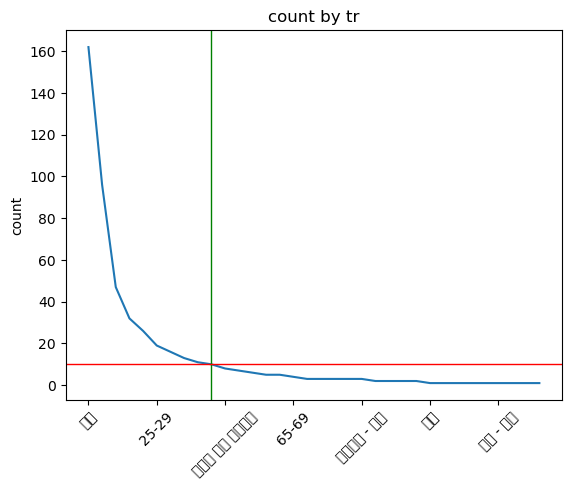

In [13]:
from matplotlib import rc  
rc('font', family='NanumGothic')  
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
# plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=9, color='g', linewidth=1)
plt.axhline(y=10, color='r', linewidth=1)

plt.show()
# (298, 276)
# 9%(25/276)의 항목 3%(10/298*100) 발생 -> min_support=0.03 으로 해보자

In [14]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets

,support,itemsets
0,0.446309,(여자)
1,0.137584,"(기타 - 상세불명의 장소, 부대·부속시설 )"
2,0.543624,(남자)
3,0.322148,(0-4)
4,0.318792,(눌림·끼임)
5,0.127517,(주택 - 현관 )
6,0.473154,(열상(찢어짐))
7,0.107383,(예리함·마감처리 불량)
8,0.251678,(주택 - 침실/방 )
9,0.127517,((부위)머리 및 뇌(뇌막))


##### 빈발항목 분석 결과 

1. 성별에 따른 사고 빈도
여자: 전체 데이터에서 **44.63%**의 빈도를 차지합니다.
남자: 전체 데이터에서 **54.36%**의 빈도
여성이 차지하는 사고 비율이 높지 않지만, 전체 데이터에서 남성의 비율이 약간 더 높습니다.

2. 연령대 및 사고 유형
0-4세: **32.21%**의 빈도로, 이 연령대에서 많은 사고가 발생
5-9세: **15.77%**의 빈도로, 상대적으로 낮지만 주의가 필요한 연령대
어린이(특히 0-4세)에서 사고 발생 빈도가 높아 이 연령대에 대한 주의가 필요

3. 주요 사고 유형
열상(찢어짐): 전체 데이터에서 **47.31%**의 빈도를 차지
부딪힘: **27.18%**의 빈도를 차지
눌림·끼임: **31.88%**의 빈도를 차지
열상(찢어짐)이 가장 빈번하게 발생하며, 부딪힘과 눌림·끼임 사고도 높은 빈도를 보임

4. 주요 사고 장소 및 부위
주택 - 침실/방: **25.17%**의 빈도로 주요 사고 장소 중 하나임
(부위)손가락: **37.91%**의 빈도로 주요 사고 부위
주택 내 침실/방에서 손가락 부위의 사고가 많이 발생함

5. 연관 항목 분석
여자 + 열상(찢어짐): **19.13%**의 빈도로 여성에게 발생하는 열상 사고가 빈번함
남자 + 0-4세: **14.76%**의 빈도로, 남성 어린이(0-4세)에게서 발생하는 사고가 많음
열상(찢어짐) + (부위)손가락: **17.14%**의 빈도로, 손가락 부위의 열상 사고가 많음
눌림·끼임 + (부위)손가락: **29.53%**의 빈도로, 손가락 부위의 눌림·끼임 사고가 많음
부딪힘 + 열상(찢어짐): **21.14%**의 빈도로, 부딪힘 사고와 열상 사고가 자주 함께 발생함

In [15]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.446309,(여자),1
1,0.137584,"(기타 - 상세불명의 장소, 부대·부속시설 )",1
2,0.543624,(남자),1
3,0.322148,(0-4),1
4,0.318792,(눌림·끼임),1


In [16]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2

,support,itemsets,length
14,0.191275,"(여자, 열상(찢어짐))",2
15,0.147651,"(남자, 0-4)",2
16,0.174497,"(0-4, 여자)",2
17,0.130872,"(0-4, 열상(찢어짐))",2
18,0.204698,"(0-4, (부위)손가락)",2
19,0.110738,"(0-4, 여자, (부위)손가락)",3
20,0.197987,"(눌림·끼임, 0-4)",2
21,0.164430,"(눌림·끼임, 남자)",2
22,0.154362,"(눌림·끼임, 여자)",2
23,0.124161,"(눌림·끼임, 열상(찢어짐))",2


- 여아와 남아 모두 0-4세 사이에서 사고 발생 빈도가 높으며, 특히 손가락 부위에서 사고가 자주 발생

- 열상(찢어짐), 부딪힘, 눌림·끼임 사고가 주로 발생

- 열상(찢어짐) 사고가 빈번하게 발생하며, 이는 날카로운 물체나 마감처리 불량에 의해 발생

- 주택 내의 침실/방에서 사고가 많이 발생

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

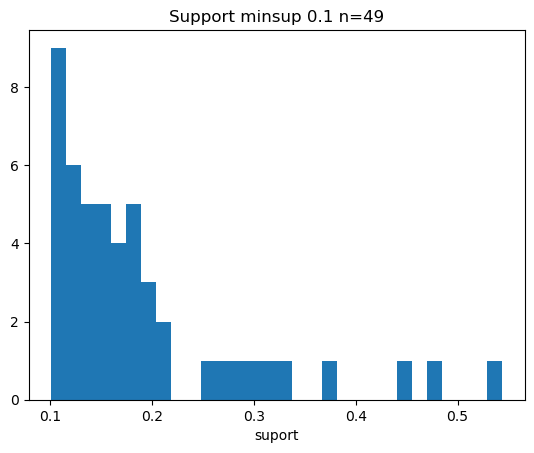

In [17]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsup {min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

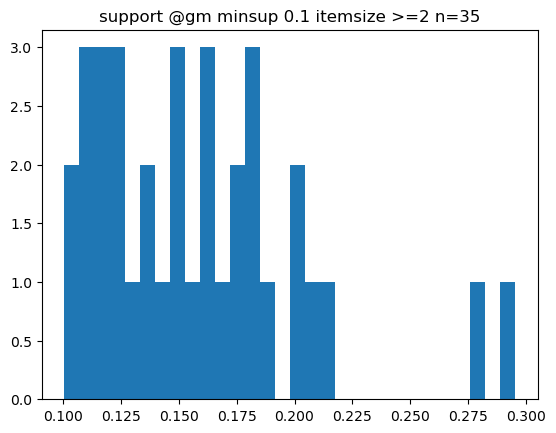

In [18]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'support @gm minsup {min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

## 2. 연관규칙 분석

In [19]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,"(주택 - 침실/방 , 눌림·끼임)",((부위)손가락),0.164430,0.379195,0.161074,0.979592,2.583348,0.098723,30.419463,0.733517
44,"(주택 - 침실/방 , 눌림·끼임, 0-4)",((부위)손가락),0.120805,0.379195,0.117450,0.972222,2.563913,0.071641,22.348993,0.693784
46,"(주택 - 침실/방 , 0-4, (부위)손가락)",(눌림·끼임),0.124161,0.318792,0.117450,0.945946,2.967283,0.077868,12.602349,0.756979
22,"(눌림·끼임, 여자)",((부위)손가락),0.154362,0.379195,0.144295,0.934783,2.465179,0.085762,9.519016,0.702842
11,"(눌림·끼임, 0-4)",((부위)손가락),0.197987,0.379195,0.184564,0.932203,2.458377,0.109488,9.156879,0.739673
...,...,...,...,...,...,...,...,...,...,...
8,(눌림·끼임),(남자),0.318792,0.543624,0.164430,0.515789,0.948798,-0.008873,0.942515,-0.073405
17,"(눌림·끼임, (부위)손가락)",(남자),0.295302,0.543624,0.151007,0.511364,0.940657,-0.009527,0.933978,-0.082168
19,"(눌림·끼임, 0-4)",(여자),0.197987,0.446309,0.100671,0.508475,1.139289,0.012308,1.126475,0.152441
57,(부딪힘),"(남자, 열상(찢어짐))",0.271812,0.281879,0.137584,0.506173,1.795708,0.060966,1.454195,0.608520


- 0-4세 아동이 주택 내 침실/방에서 눌림·끼임 사고를 당하면, 거의 대부분 손가락 부위에 영향을 미침.

- 주택 내 침실/방에서 눌림·끼임 사고가 발생하면, 거의 대부분 손가락 부위에 영향을 미침.

- 0-4세 아동이 열상(찢어짐) 사고를 당할 가능성이 있음

- 0-4세 아동이 남아일 가능성이 있음

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

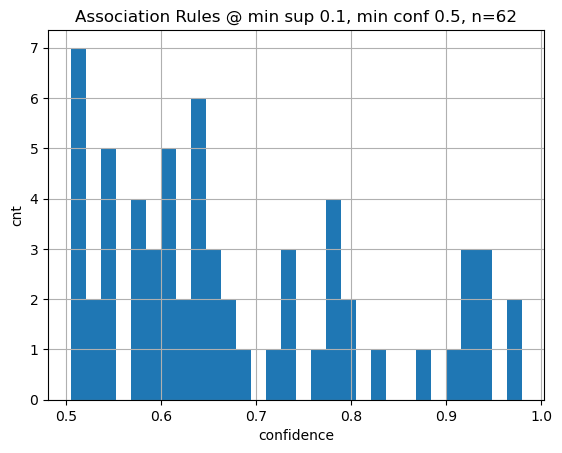

In [20]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

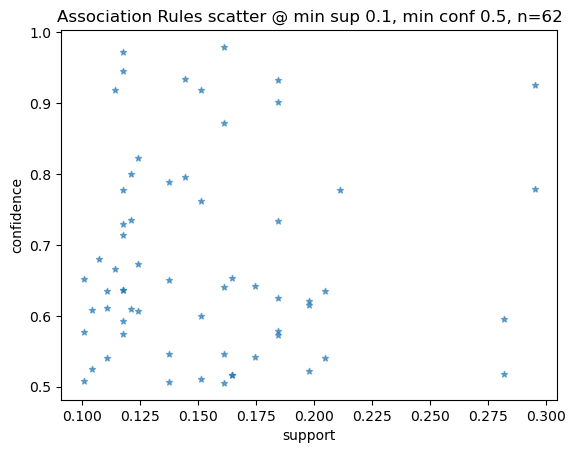

In [21]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

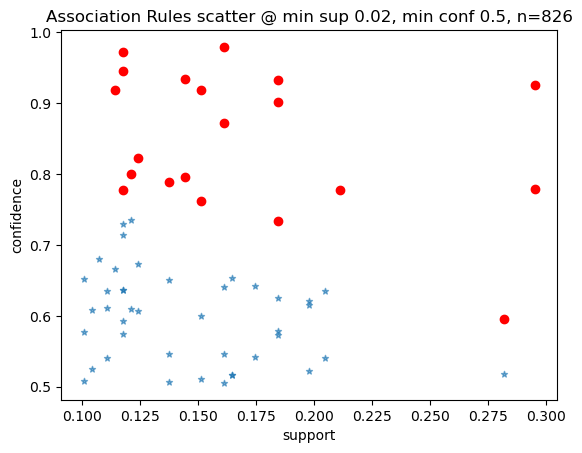

In [22]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [23]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
9,(눌림·끼임),((부위)손가락),0.318792,0.379195,0.295302,0.926316,2.442850,0.174418,8.425216,0.867051,1.221618
33,"(주택 - 침실/방 , 눌림·끼임)",((부위)손가락),0.164430,0.379195,0.161074,0.979592,2.583348,0.098723,30.419463,0.733517,1.140666
11,"(눌림·끼임, 0-4)",((부위)손가락),0.197987,0.379195,0.184564,0.932203,2.458377,0.109488,9.156879,0.739673,1.116767
44,"(주택 - 침실/방 , 눌림·끼임, 0-4)",((부위)손가락),0.120805,0.379195,0.117450,0.972222,2.563913,0.071641,22.348993,0.693784,1.089672
13,"(0-4, (부위)손가락)",(눌림·끼임),0.204698,0.318792,0.184564,0.901639,2.828300,0.119308,6.925615,0.812812,1.086203
22,"(눌림·끼임, 여자)",((부위)손가락),0.154362,0.379195,0.144295,0.934783,2.465179,0.085762,9.519016,0.702842,1.079078
10,((부위)손가락),(눌림·끼임),0.379195,0.318792,0.295302,0.778761,2.442850,0.174418,3.079060,0.951413,1.074063
16,"(눌림·끼임, 남자)",((부위)손가락),0.164430,0.379195,0.151007,0.918367,2.421889,0.088656,7.604866,0.702633,1.069374
46,"(주택 - 침실/방 , 0-4, (부위)손가락)",(눌림·끼임),0.124161,0.318792,0.117450,0.945946,2.967283,0.077868,12.602349,0.756979,1.063396
34,"(주택 - 침실/방 , (부위)손가락)",(눌림·끼임),0.184564,0.318792,0.161074,0.872727,2.737608,0.102236,5.352349,0.778378,1.033801


In [24]:
indices_to_drop = [26, 56, 53]
top_20_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)
top_20_rules

KeyError: '[26, 56] not found in axis'

In [ ]:
top_20_rules = top_20_rules.sort_values(by='confidence', ascending=False)
top_20_rules

- 주택의 침실/방에서 눌리거나 끼임이 손가락 부위에 일어날 확률이 매우 높다

- 0~4세 아동이 주택의 침실/방에서 눌리거나 끼임을 당했을 경우 손가락 부위에 일어날 확률이 매우 높다

- 0~4세 아동이 주택의 침실/방에서 손가락 부위에 부상을 입었을 경우 이는 눌리거나 끼였을 확률이 매우 높다

- 여자가 눌리거나 끼였을 떄 손가락 부위에 입었을 확률이 매우 높다

- 0~4세 아동이 눌리거나 끼였을 경우 손가락 부위에 입었을 확률이 매우 높다

- 눌리거나 끼여서 열상(찢어짐)의 부상을 입은 경우 손가락 부위에 입었을 확률이 매우 높다

In [ ]:
# 향상도 관찰
# 연관규칙의 향상도 분포
rules_conf.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [ ]:
filter = rules_conf.lift.ge(2.5)
rules_conf[filter].sort_values(by='lift', ascending=False)

In [ ]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
rules_conf.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [ ]:
filter = rules_conf.leverage.ge(0.09)
rules_conf[filter].sort_values(by='leverage', ascending=False)

In [ ]:
'''# 확신 관찰
# 연관규칙의 확신 분포
rules_conv.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 있음'''

In [ ]:
# conviction 값이 inf가 아닌 행들만 필터링
filtered_rules_conf = rules_conf[rules_conf['conviction'] != float('inf')]

# 히스토그램 시각화
filtered_rules_conf.hist('conviction', bins=30)
plt.title(f'conviction {txt}')
plt.show()

In [ ]:
filter = rules_conf.conviction.ge(8)
rules_conf[filter].sort_values(by='conviction', ascending=False)

- 여성이 눌림·끼임 사고를 당하면, 손가락 부위에 큰 영향을 미침

- 0-4세 아동의 경우 눌림·끼임 사고가 손가락 부위에 집중

- 0-4세 아동이 열상(찢어짐)과 눌림·끼임 사고에 특히 취약

- 이 연령대의 아동들이 주로 집 안에서 사고를 많이 당함 

- 주택 내 침실/방에서 발생하는 사고가 많으며, 이는 손가락 부위에 큰 영향

-눌림·끼임 사고가 열상(찢어짐) 사고로 이어지는 경우가 많음

In [ ]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")